In [1]:
#Who is the audience? Non-technical (public) audience

#Relationship, Distribution, Composition, Comparison

#What relationship are we analyzing? 
    # Proportion of domestic/pet animals per total animal bites
    # Distribution of animal bites (location on body, level of harm)
    
#What story are we telling? What domestic animals are the most dangerous?

In [2]:
#Types of data visualizations:
    # histogram or pie chart (total pet animal bites) for comparison
    # horizontal bar graph (bite location for all pet animals)
    # spider chart (maybe?): bites per disposition?

In [3]:
#Animal Bites Dataset

In [4]:
#histogram: a) subset for domestic animals only ['DOG','CAT','RABBIT','HORSE']; b) histogram with frequency of each of four categories

# historgram/pie chart: propoertion of dom-animal bites for the four categories
# proportion of bites per all bites?

#WhereBitten: body vs head vs unknown for all animals (multi-bar histogram)



In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("Health_AnimalBites.csv")

In [6]:
df.columns

Index(['bite_date', 'SpeciesIDDesc', 'BreedIDDesc', 'GenderIDDesc', 'color',
       'vaccination_yrs', 'vaccination_date', 'victim_zip', 'AdvIssuedYNDesc',
       'WhereBittenIDDesc', 'quarantine_date', 'DispositionIDDesc',
       'head_sent_date', 'release_date', 'ResultsIDDesc'],
      dtype='object')

In [7]:
df.isna().sum()

bite_date             317
SpeciesIDDesc         118
BreedIDDesc          5244
GenderIDDesc         2526
color                2577
vaccination_yrs      5265
vaccination_date     4888
victim_zip           1838
AdvIssuedYNDesc      6438
WhereBittenIDDesc     616
quarantine_date      6983
DispositionIDDesc    7468
head_sent_date       8608
release_date         7558
ResultsIDDesc        7460
dtype: int64

In [8]:
df.WhereBittenIDDesc.unique()

array(['BODY', 'HEAD', nan, 'UNKNOWN'], dtype=object)

In [9]:
df.SpeciesIDDesc.unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

In [10]:
df.head(5)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [11]:
df.dtypes

bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
AdvIssuedYNDesc       object
WhereBittenIDDesc     object
quarantine_date       object
DispositionIDDesc     object
head_sent_date        object
release_date          object
ResultsIDDesc         object
dtype: object

In [12]:
df.shape

(9003, 15)

In [13]:
#interested in dogs only: subset dataframe under SpeciesIDDesc == 'DOG'
df_dogs = df.loc[df['SpeciesIDDesc'] == 'DOG']
df_dogs.shape
df_dogs.BreedIDDesc.isna().sum() #no NA values in breed
df_dogs1 = df_dogs.dropna(subset = ['BreedIDDesc'])
df_dogs1.head()
df_dogs1.shape

df_top25_dogs = pd.DataFrame(df_dogs1.BreedIDDesc.groupby(df_dogs1.BreedIDDesc).value_counts().nlargest(25))
#top25_list = list(df_top25_dogs.BreedIDDesc)
df_top25_dogs.index = df_top25_dogs.index.droplevel(0)
list1 = list(df_top25_dogs.index)
list1
df_top25_dogs.columns = ['bite_count']
df_top25_dogs['dog_breed'] = df_top25_dogs.index
df_top25_dogs.reset_index(drop=True, inplace=True)
df_top25_dogs.shape

#df_top25_dogs1 = df_top25_dogs[df_top25_dogs['BreedIDDesc'].isin(list1)]
#df_top25_dogs1.head()

(25, 2)

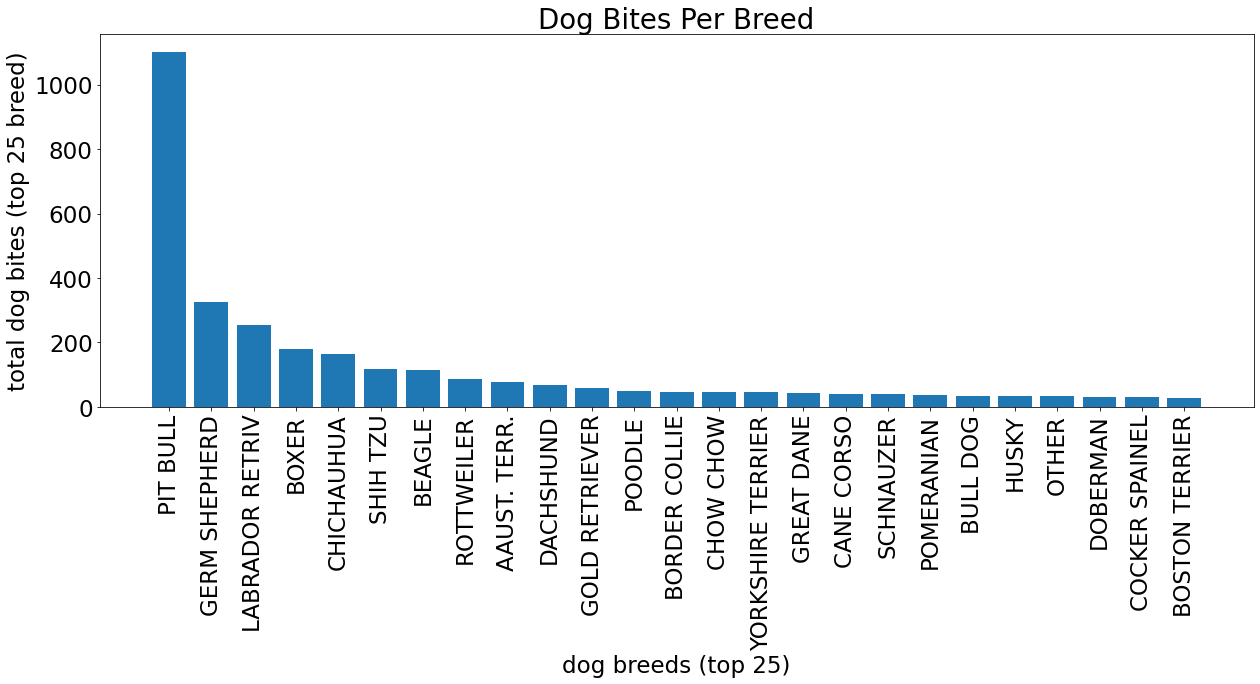

In [32]:
df_top25_dogs.head()

fig_dog_bites25 = plt.figure(figsize = (18,10))

plt.bar(df_top25_dogs.dog_breed, df_top25_dogs.bite_count)
plt.xticks(rotation=90)
plt.ylabel('total dog bites (top 25 breed)')
plt.xlabel('dog breeds (top 25)')
plt.title("Dog Bites Per Breed")
plt.rcParams.update({'font.size':23})
plt.tight_layout()
plt.savefig("Dog Bites Per Breed.png")

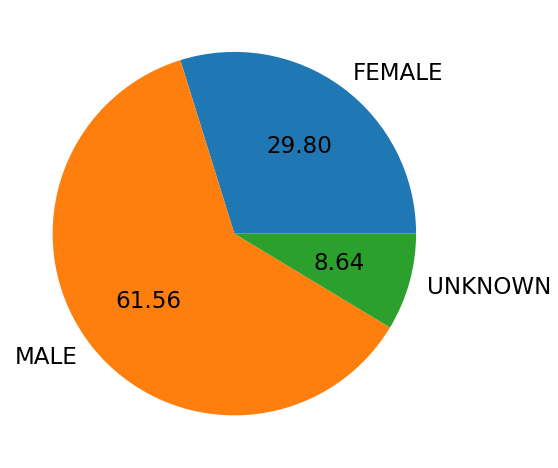

In [41]:
#dog gender: pie chart? male vs female
df_dogs.head()
df_dogs.GenderIDDesc.value_counts() #3300 vs 1600; 460 unknown
df_dogs.GenderIDDesc.isna().sum()  #1650 na; can just drop
df_dogs_gender = df_dogs.dropna(subset = ['GenderIDDesc'])
df_dogs_gender.isna().sum()
df_dogs_gender = pd.DataFrame(df_dogs_gender.GenderIDDesc.groupby(df_dogs_gender.GenderIDDesc).value_counts())
df_dogs_gender.columns = ['dog_gender_count']
df_dogs_gender.index = df_dogs_gender.index.droplevel(0)
df_dogs_gender['dog_gender'] = df_dogs_gender.index
df_dogs_gender.reset_index(drop=True, inplace=True)

df_dogs_gender.head()

fig_pieChart = plt.figure(figsize=(10,7))
plt.pie(df_dogs_gender.dog_gender_count, labels =df_dogs_gender.dog_gender, autopct='%.2f')

plt.rcParams.update({'font.size':23})
plt.tight_layout()
plt.savefig("Dog Bites Per Gender.png")

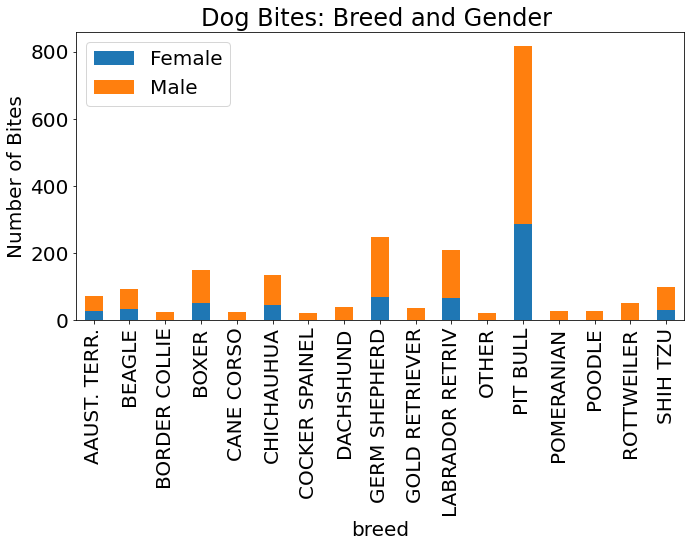

In [69]:
#create a subset dataframe similar to df_top25_dogs with gender included
df_top10_bites_gender = pd.DataFrame(df_dogs1.BreedIDDesc.groupby([df_dogs1.BreedIDDesc,df_dogs1.GenderIDDesc]).value_counts().nlargest(25))
df_top10_bites_gender.columns = ['bite_count']
df_stacked = df_top10_bites_gender.reset_index(level=[0,1])
df_stacked.columns = ['breed','gender','bite_count']
df_stacked.reset_index(drop=True, inplace=True)
df_stacked1 = df_stacked.set_index(['breed', 'gender'])

stacked = df_stacked1.unstack().plot(kind='bar', figsize=(10,8), stacked=True)

stacked.legend(['Female', 'Male'])
plt.ylabel("Number of Bites")
plt.title("Dog Bites: Breed and Gender ")
plt.tight_layout()
plt.rcParams.update({'font.size':20})

plt.savefig("DogBites_stacked.png")